In [167]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import metrics

In [168]:
df1 = pd.read_csv('/content/Tasmania_Data.csv')
df2 = pd.read_csv('/content/Perth_Data.csv')
df3 = pd.read_csv('/content/Sydney_Data.csv')
df4 = pd.read_csv('/content/Adelaide_Data.csv')

In [169]:
df1.head()

,546.1931,194.5337,160.084,435.5412,220.8238,449.5166,396.1027,231.7794,69.3599,474.1572,...,216324.3888,242794.9467,234589.0464,241446.2196,266320.5629,188114.6855,170653.5874,195915.6535,180922.3979,3648666.894
0,281.0669,390.3761,561.0742,295.9217,565.5344,236.3035,393.0648,340.0667,213.7463,457.8913,...,228315.9892,196579.4315,265924.2946,236228.4838,229197.3604,212649.9615,253153.4761,265363.3600,251322.8751,3810742.386
1,566.0000,566.0000,346.5334,202.2120,389.6777,277.7876,421.9610,260.3339,464.1620,566.0000,...,216919.6851,210539.3646,234470.2783,245953.6945,200980.6210,203164.4624,262784.1109,269371.6293,265446.7199,3745925.666
2,2.1045,352.3969,285.2965,566.0000,532.4306,176.8103,566.0000,0.0000,234.7225,485.8672,...,231355.4783,267915.4110,239599.8014,239349.6550,239027.6745,194421.2484,200775.3338,265827.1867,271780.8771,3781329.415
3,168.5854,550.6155,0.0000,566.0000,450.8427,0.0000,566.0000,566.0000,458.9008,227.8836,...,212278.2632,199341.9985,230549.7763,210669.8570,271101.8480,199967.8783,203943.1047,265087.0171,256492.7005,3667609.449
4,278.5785,365.0291,69.2200,216.9947,566.0000,301.4299,151.3832,566.0000,384.4588,322.3628,...,268466.9163,265857.5868,242668.5253,267390.9069,226106.6051,207986.8063,244762.5423,207071.1001,264608.5750,3751960.252


# Searching for null values

In [170]:
print(df1.isnull().sum().sum())
print(df2.isnull().sum().sum())
print(df3.isnull().sum().sum())
print(df4.isnull().sum().sum())

0
0
0
0


# Correlation matrix

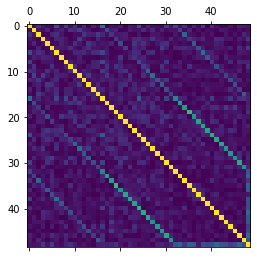

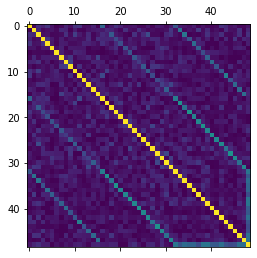

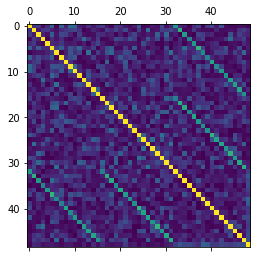

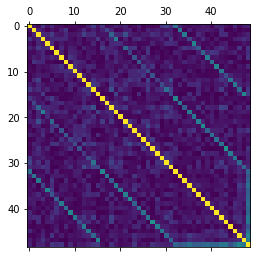

In [198]:
def correlation_matrix(df):
  corr_matrix = df.corr(
      method = 'pearson'
  ).abs()
  plt.matshow(corr_matrix)


correlation_matrix(df1)
correlation_matrix(df2)
correlation_matrix(df3)
correlation_matrix(df4)

In [199]:
from sklearn.model_selection import train_test_split

class data_frame:
  def __init__(self, df, name):
    # splitting the data
    self.X = df.iloc[:, :32]
    self.y = df.iloc[:, -1]
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.2)
    self.name = name

  def accuracy_check(self, model, y_pred):
    # calculating mean squared error and validation score
    self.mse = mean_squared_error(self.y_test, y_pred)
    self.rmse = float(format(np.sqrt(mean_squared_error(self.y_test, y_pred)), '.3f'))
    self.r2 = model.score(self.X_train, self.y_train)

    print("MSE: %.2f" % self.mse)
    print("RMSE: %.2f" % self.rmse) 
    print("R²: %.2f" % self.r2)

  def plot(self, y_pred, comparison):
    
    # plotting the comparison of actual and predicted values
    if comparison == True:
      df_temp = pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred})
      df_temp = df_temp.head(20)
      df_temp.plot(kind='bar',figsize=(7,4))
      plt.title(self.name)
      plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
      plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
      plt.show()

    plt.scatter(self.y_test, y_pred)

Tasmania = data_frame(df1, 'Tasmania')
Perth = data_frame(df2, 'Perth')
Sydney = data_frame(df3, 'Sydney')
Adelaide = data_frame(df4, 'Adelaide')

# Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

def linear_regression(df):
  clf = linear_model.LinearRegression()
  clf.fit(df.X_train, df.y_train)
  y_pred = clf.predict(df.X_test)
  return clf, y_pred

MSE: 10614680889.30
RMSE: 103027.57
R²: 0.15


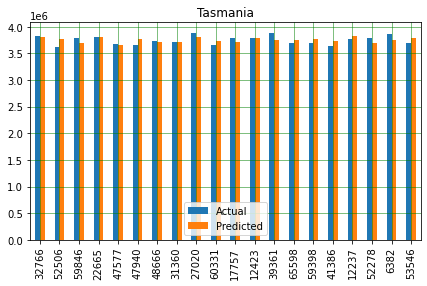

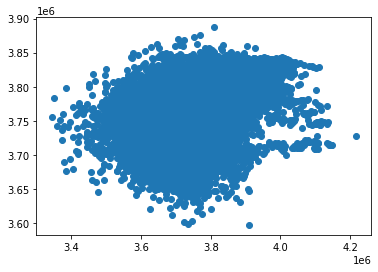

In [194]:
clf, y_pred = linear_regression(Tasmania)
Tasmania.accuracy_check(clf, y_pred)
Tasmania.plot(y_pred, True)

MSE: 2370781305.93
RMSE: 48690.67
R²: 0.14


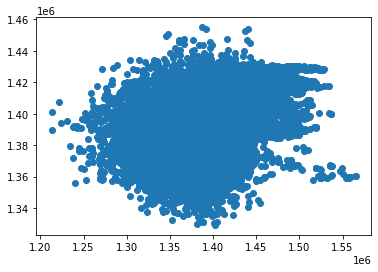

In [175]:
clf, y_pred = linear_regression(Perth)
Perth.accuracy_check(clf, y_pred)
Perth.plot(y_pred, False)

MSE: 459888093.89
RMSE: 21445.00
R²: 0.13


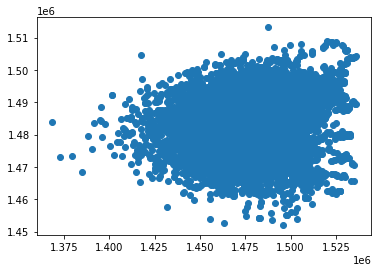

In [176]:
clf, y_pred = linear_regression(Sydney)
Sydney.accuracy_check(clf, y_pred)
Sydney.plot(y_pred,False)

MSE: 2565461385.03
RMSE: 50650.38
R²: 0.18


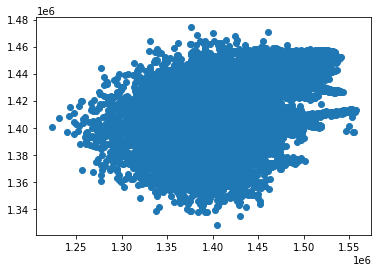

In [177]:
clf, y_pred = linear_regression(Adelaide)
Adelaide.accuracy_check(clf, y_pred)
Adelaide.plot(y_pred, False)

# Xgboost

In [178]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

def xboost(df):
  model = xgb.XGBRegressor()
  model.fit(df.X_train, df.y_train)
  y_pred = model.predict(df.X_test)
  return model, y_pred

[01:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 5275766996.59
RMSE: 72634.48
R²: 0.59


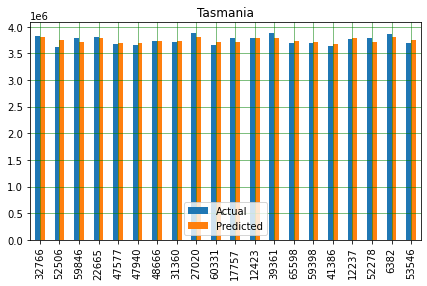

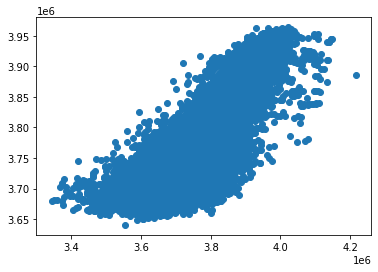

In [179]:
model, y_pred = xboost(Tasmania)
Tasmania.accuracy_check(model, y_pred)
Tasmania.plot(y_pred, True)

[01:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 858899113.32
RMSE: 29306.98
R²: 0.69


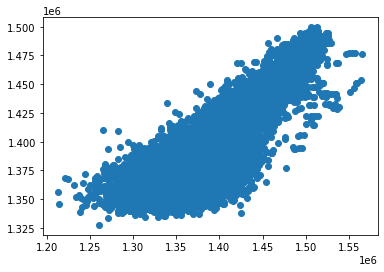

In [180]:
model, y_pred = xboost(Perth)
Perth.accuracy_check(model, y_pred)
Perth.plot(y_pred, False)

[01:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 137724760.27
RMSE: 11735.62
R²: 0.74


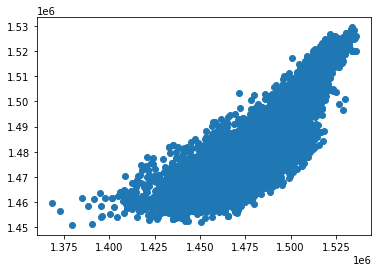

In [181]:
model, y_pred = xboost(Sydney)
Sydney.accuracy_check(model, y_pred)
Sydney.plot(y_pred, False)

[01:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 805874674.87
RMSE: 28387.93
R²: 0.75


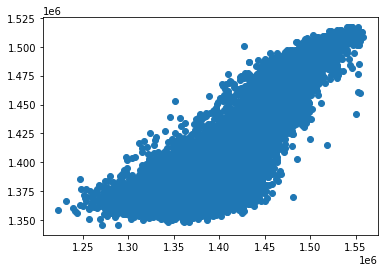

In [182]:
model, y_pred = xboost(Adelaide)
Adelaide.accuracy_check(model, y_pred)
Adelaide.plot(y_pred, False)

# Random forest

In [183]:
from sklearn.ensemble import RandomForestRegressor

def rand_forest(df):
  model = RandomForestRegressor(n_estimators = 10, random_state = 0)
  model.fit(df.X_train, df.y_train)
  y_pred = model.predict(df.X_test)
  return model, y_pred

MSE: 4227748253.06
RMSE: 65021.14
R²: 0.94


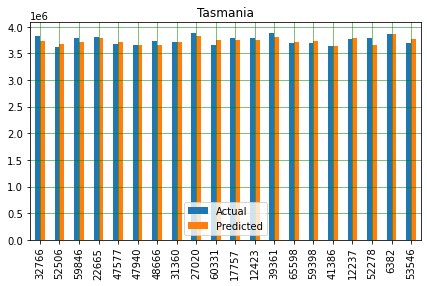

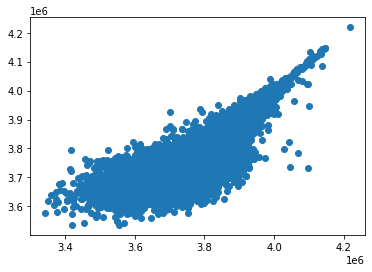

In [184]:
model, y_pred = rand_forest(Tasmania)
Tasmania.accuracy_check(model, y_pred)
Tasmania.plot(y_pred, True)

MSE: 657588260.82
RMSE: 25643.48
R²: 0.96


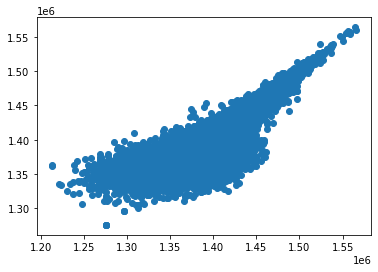

In [185]:
model, y_pred = rand_forest(Perth)
Perth.accuracy_check(model, y_pred)
Perth.plot(y_pred, False)

MSE: 83919679.20
RMSE: 9160.77
R²: 0.97


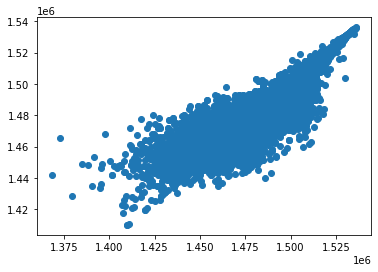

In [186]:
model, y_pred = rand_forest(Sydney)
Sydney.accuracy_check(model, y_pred)
Sydney.plot(y_pred, False)

MSE: 635341457.77
RMSE: 25205.98
R²: 0.96


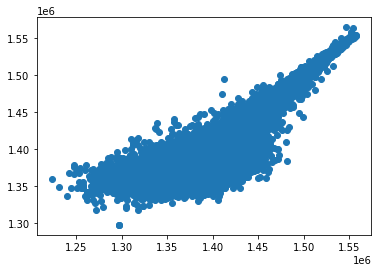

In [187]:
model, y_pred = rand_forest(Adelaide)
Adelaide.accuracy_check(model, y_pred)
Adelaide.plot(y_pred, False)

# Light GBM

In [188]:
import lightgbm as lgb
from sklearn.metrics import r2_score

def light_gbm(df):
  params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
  }
  # laoding data
  lgb_train = lgb.Dataset(df.X_train, df.y_train)
  lgb_eval = lgb.Dataset(df.X_test, df.y_test, reference=lgb_train)

  # fitting the model
  modelGBM = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval,
                  verbose_eval=False,
                  early_stopping_rounds=30)
  # prediction
  y_pred = modelGBM.predict(df.X_test)

  return modelGBM, y_pred

def lightGBM_accuracy(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse**(0.5)
  r2 = r2_score(y_test, y_pred)

  print("R²: %.2f" % r2)
  print("MSE: %.2f" % mse)
  print("RMSE: %.2f" % rmse) 

R²: 0.65
MSE: 4293908971.18
RMSE: 65527.93


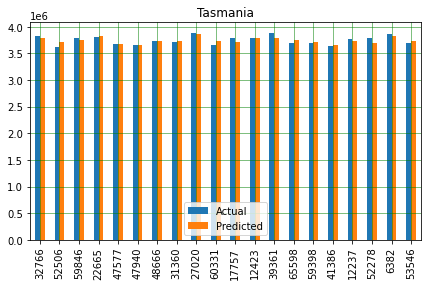

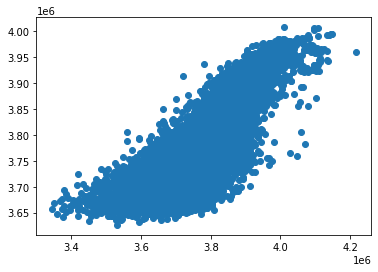

In [189]:
model, y_pred = light_gbm(Tasmania)
lightGBM_accuracy(Tasmania.y_test, y_pred)
Tasmania.plot(y_pred, True)

R²: 0.76
MSE: 648370884.50
RMSE: 25463.13


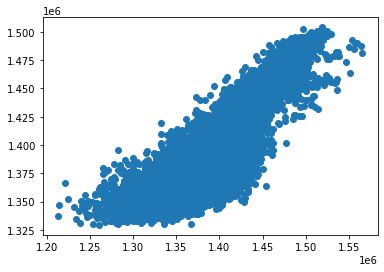

In [190]:
model, y_pred = light_gbm(Perth)
lightGBM_accuracy(Perth.y_test, y_pred)
Perth.plot(y_pred, False)

R²: 0.81
MSE: 103109710.28
RMSE: 10154.30


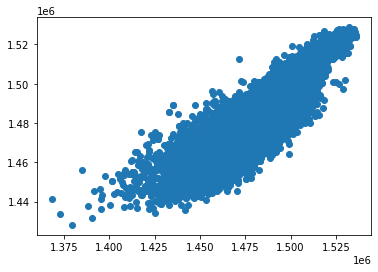

In [191]:
model, y_pred = light_gbm(Sydney)
lightGBM_accuracy(Sydney.y_test, y_pred)
Sydney.plot(y_pred, False)

R²: 0.80
MSE: 630719145.98
RMSE: 25114.12


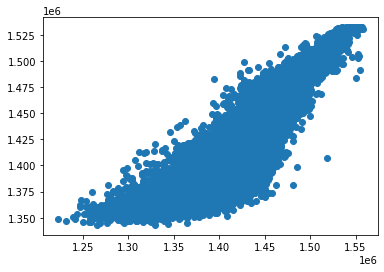

In [192]:
model, y_pred = light_gbm(Adelaide)
lightGBM_accuracy(Adelaide.y_test, y_pred)
Adelaide.plot(y_pred, False)

## MLP regressor

In [196]:
from sklearn.neural_network import MLPRegressor

def mlp(df):
  model = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
  model.fit(df.X_train, df.y_train)
  y_pred = model.predict(df.X_test)
  return model, y_pred


R²: 0.62
MSE: 4759971013.89
RMSE: 68992.54


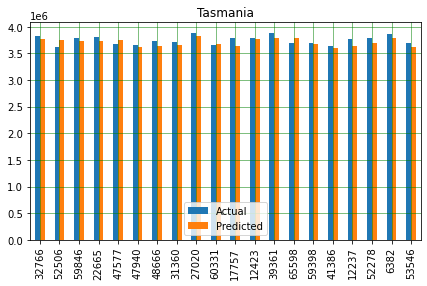

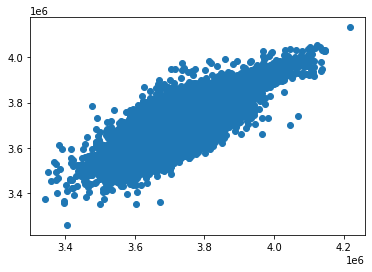

In [197]:
model, y_pred = mlp(Tasmania)
lightGBM_accuracy(Tasmania.y_test, y_pred)
Tasmania.plot(y_pred, True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


R²: 0.62
MSE: 1040370522.57
RMSE: 32254.78


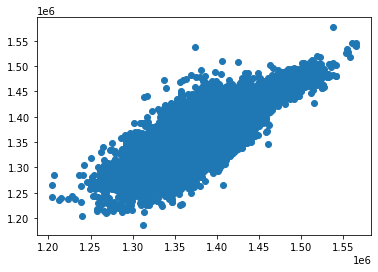

In [200]:
model, y_pred = mlp(Perth)
lightGBM_accuracy(Perth.y_test, y_pred)
Perth.plot(y_pred, False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


R²: -2.48
MSE: 1827658941.50
RMSE: 42751.13


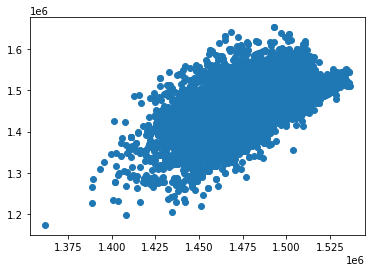

In [201]:
model, y_pred = mlp(Sydney)
lightGBM_accuracy(Sydney.y_test, y_pred)
Sydney.plot(y_pred, False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


R²: 0.72
MSE: 884548049.54
RMSE: 29741.35


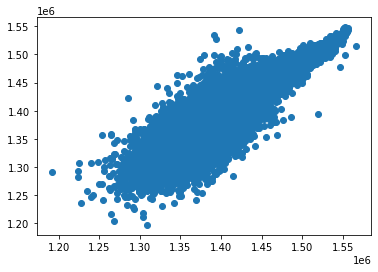

In [202]:
model, y_pred = mlp(Adelaide)
lightGBM_accuracy(Adelaide.y_test, y_pred)
Adelaide.plot(y_pred, False)